In [219]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

### Reading data 📖

In [220]:
sleep_data=pd.read_csv('/Users/irasafonik/Desktop/kaggle/Sleep_health_and_lifestyle_dataset.csv')
sleep_data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Visualization

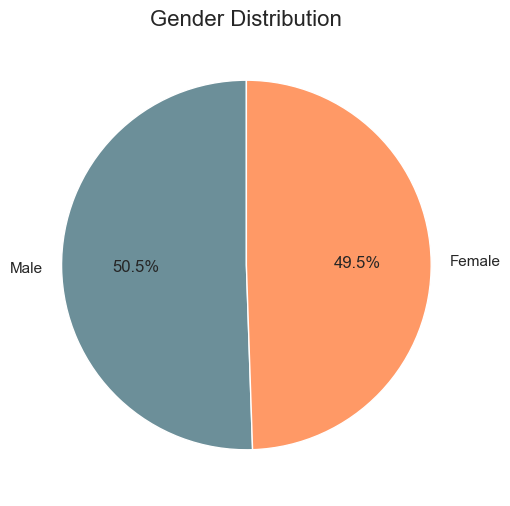

In [253]:
# Creating a figure with specified size
plt.figure(figsize=(6, 6))

# Counting the occurrences of each gender in the dataset
gender_counts = sleep_data['Gender'].value_counts()

# Defining colors for the pie chart
colors = ['#6c8f99', '#ff9966']

# Creating a pie chart with gender distribution
plt.pie(gender_counts, 
        labels=gender_counts.index,  # Setting labels to display gender names
        autopct='%1.1f%%',  # Adding percentage values to each slice
        startangle=90,  # Rotating the pie chart to start from the top
        colors=colors)  # Assigning colors to each slice

# Adding title to the plot
plt.title('Gender Distribution', fontsize=16)

# Displaying the plot
plt.show()


#### 📊 Сonclusions
#### 🔶 Among the individuals in the dataset, approximately 50.5% are male, while 49.5% are female.
#### 🔷 This indicates a relatively balanced representation of genders in the dataset, with a slight majority of males.

In [257]:
# Fill missing values in the 'Sleep Disorder' column with 'None'
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')

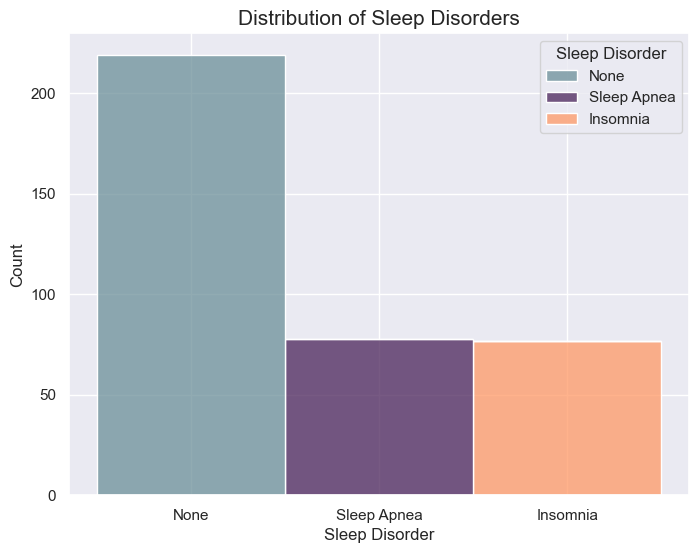

In [259]:
# Setting the seaborn style to 'darkgrid'
sns.set_style('darkgrid')

# Creating a figure with specified size
plt.figure(figsize=(8, 6))

# Creating a histogram plot of sleep disorder distribution
ax = sns.histplot(data=sleep_data, 
                  x='Sleep Disorder',  # Data to be plotted on x-axis
                  hue='Sleep Disorder',  # Variable to separate data by color
                  multiple='stack',  # Stacking bars for different categories
                  legend=True,  # Displaying legend
                  binwidth=0.5,  # Adjusting the width of histogram bins
                  palette=['#6c8f99', '#4A235A', '#ff9966'])  # Custom color palette

# Adding gridlines to the plot
plt.grid(True)

# Adding a custom title to the plot
plt.title('Distribution of Sleep Disorders', fontsize=15)

# Adding labels to the x and y axes
plt.xlabel('Sleep Disorder', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Displaying the plot
plt.show()

#### 📊 Сonclusions
#### 🔵 The absence of a sleep disorder is observed in 219 cases, representing 51.6% of the total, representing the highest proportion.
#### 🟡 Sleep apnea is identified in 78 cases, making up 18.4% of the total, making it the second most common disorder.
#### 🟢 Insomnia is recorded in 77 cases, accounting for 18.1% of the total, ranks third in terms of frequency among the examined sleep disorders.

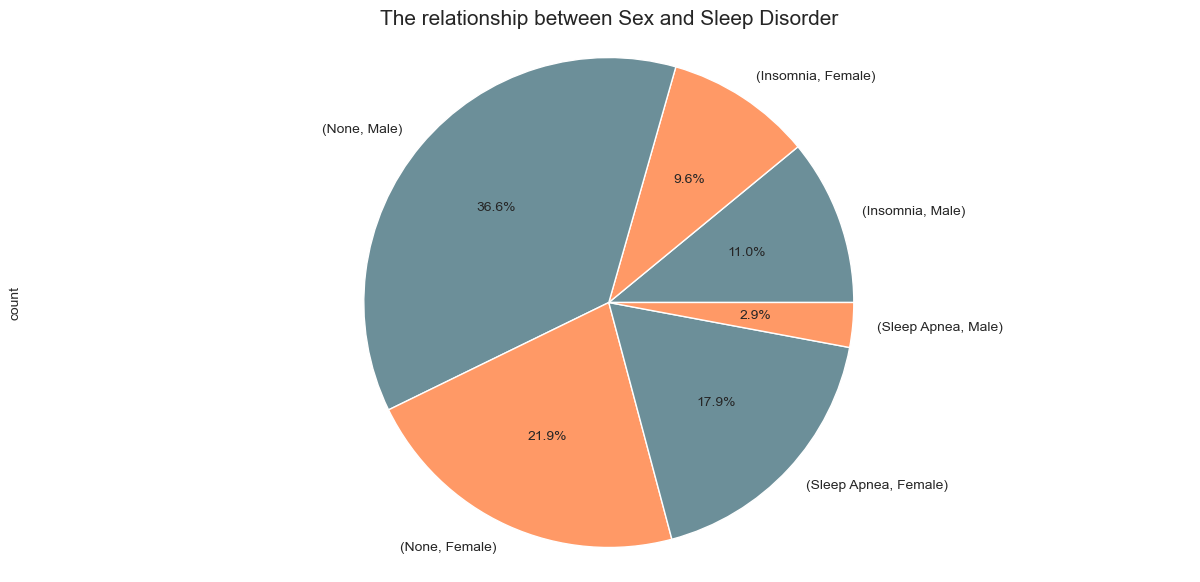

In [58]:
# Grouping and plotting a pie chart with muted colors
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%', figsize=(15, 7), colors=['#6c8f99', '#ff9966'])

# Adding a title
plt.title('The relationship between Sex and Sleep Disorder', fontsize=15)

# Setting equal aspect ratio for both axes
plt.axis('equal')

# Displaying the plot
plt.show()

#### 📊 Сonclusions
#### 🔵 Insomnia: Females have a slightly lower percentage of insomnia cases (10%) compared to males (11%).
#### 🟡 None (No disorder): Males exhibit a higher percentage of cases without sleep disorders (37%) compared to females (22%).
#### 🟢 Sleep Apnea: Females show a notably higher percentage of sleep apnea cases (18%) compared to males (3%).

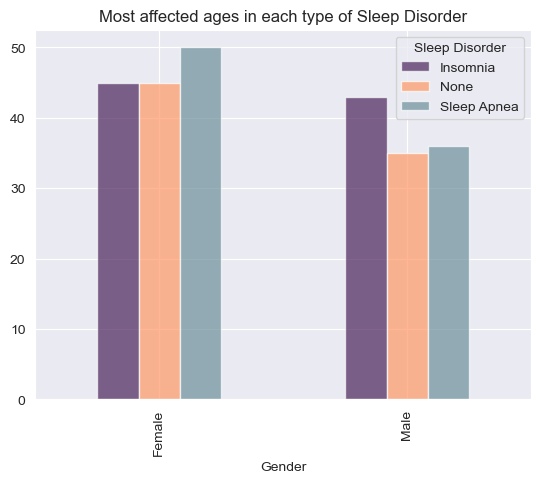

In [66]:
sleep_data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',color={'#6c8f99','#4A235A','#ff9966'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)


plt.show()

#### 📊 Сonclusions
#### 🔵 None (No disorder): In the male group, the median age is 35 years, whereas in the female group, it is 45 years. This demonstrates a significant age difference between males and females without sleep disorders.
#### 🟡 Sleep Apnea: In the male group, the median age is 36 years, while in the female group, it is 50 years. This highlights a substantial age difference between males and females with sleep apnea.
#### 🟢 Insomnia: In the male group, the median age is 43 years, while in the female group, it is 45 years. This indicates a slight difference in age between males and females with insomnia.

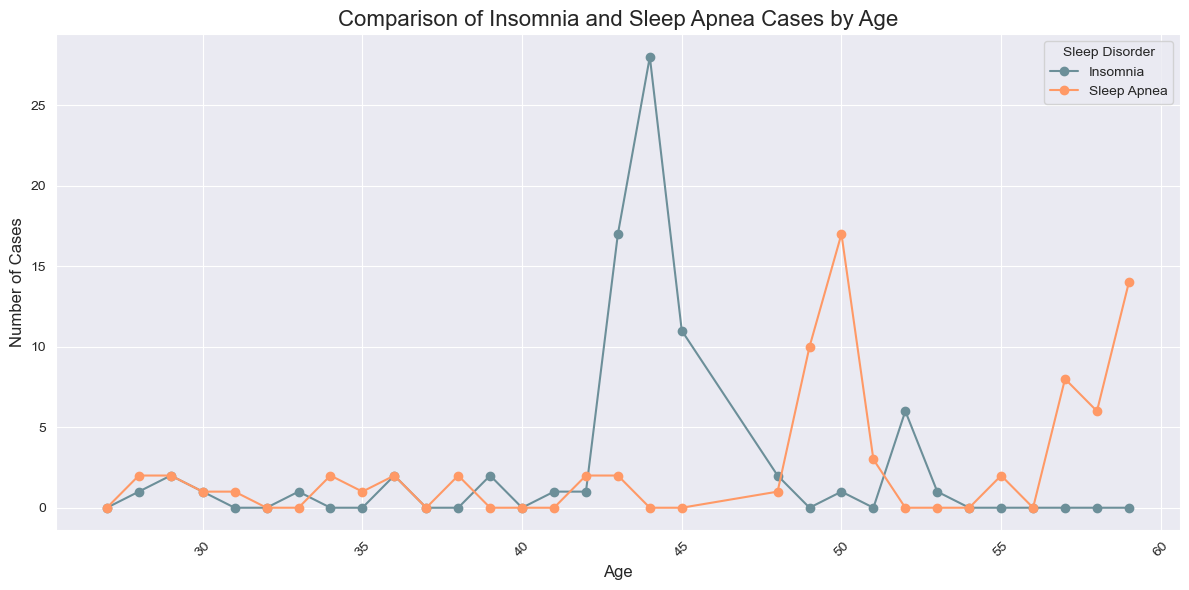

In [87]:
# Grouping the data by age and sleep disorder
age_sleep_disorder = sleep_data.groupby(['Age', 'Sleep Disorder']).size().unstack(fill_value=0)

# Plotting the data on a graph
age_sleep_disorder[['Insomnia', 'Sleep Apnea']].plot(kind='line', marker='o', figsize=(12, 6))

# Adding a title and axis labels
plt.title('Comparison of Insomnia and Sleep Apnea Cases by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

# Displaying the legend
plt.legend(title='Sleep Disorder')

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📊 Сonclusions (Insomnia)
#### 🔵 Between the ages of 27 and 36, there is a small percentage of cases of insomnia, ranging from 1% to 11%.
#### 🟡 After the age of 36, cases of insomnia increase, reaching a peak from 38 to 41 years old, where the percentage jumps to 28%.
#### 🟢 After the age of 41, cases of insomnia gradually decrease, from 28% to 0% at the age of 59.

#### 📊 Сonclusions (Sleep Apnea)
#### 🔵 For Sleep Apnea, the percentage of cases remains relatively low across all age groups, with sporadic increases and decreases.
#### 🟡 The highest percentage occurs between the ages of 45 to 50, where it peaks at 17%, but then drops back to 3% by age 51.
#### 🟢 Overall, Sleep Apnea appears to have less variation with age compared to Insomnia, with no clear trend of increasing or decreasing prevalence with age.

In [222]:
# Replace 'Normal' category in 'BMI Category' column with 'Normal Weight' for clarity
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace({'Normal': 'Normal Weight'})

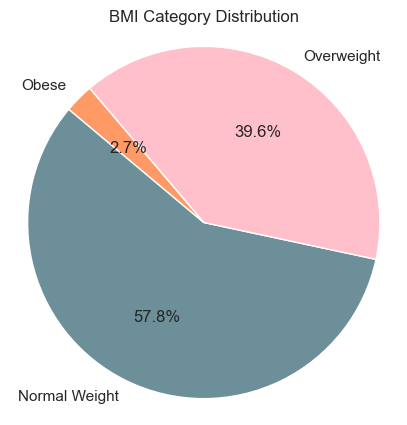

In [228]:
# Counting the occurrences of each BMI category in the dataset
bmi_counts = sleep_data['BMI Category'].value_counts()

# Define colors for the pie chart
colors = ['#6c8f99', 'pink', '#ff9966']

# Creating a pie chart to visualize the distribution of BMI categories
plt.figure(figsize=(5, 5))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding title to the pie chart
plt.title("BMI Category Distribution")

# Ensuring equal aspect ratio for a circular pie chart
plt.axis('equal')

# Displaying the plot
plt.show()

#### 📊 Сonclusions 
#### 🔵 The analysis of the data reveals that the majority of participants in the study fall into the "Normal Weight" category, comprising approximately 57.75%.
#### 🟡 A smaller proportion of individuals belong to the "Overweight" category, accounting for around 39.57% of the dataset.
#### 🟢 Only a minority of participants are classified as "Obese," constituting approximately 2.67% of the total.

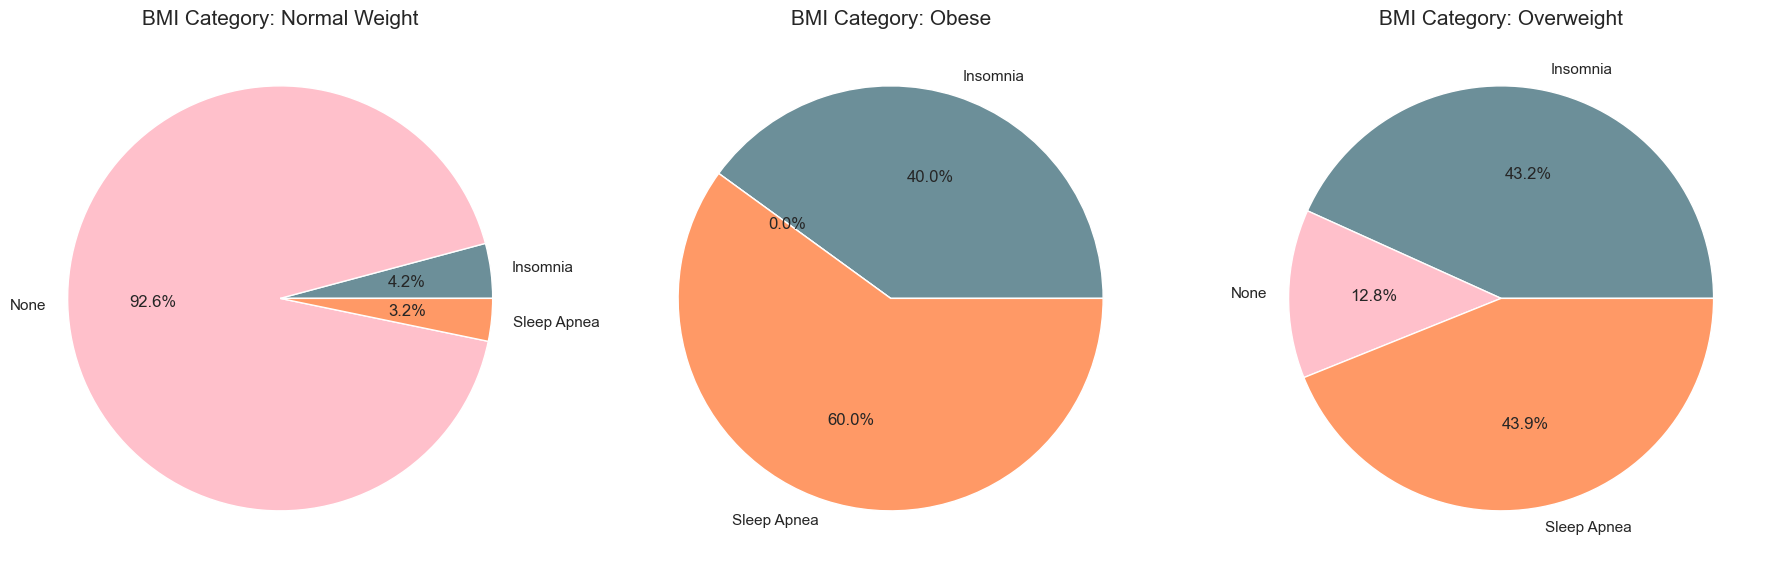

In [155]:
# Grouping the data by 'BMI Category' and 'Sleep Disorder', and calculating the count of each combination
bmi_sleep_counts = sleep_data.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)

# Plotting pie charts for each BMI category in a single row
fig, axes = plt.subplots(1, len(bmi_sleep_counts.index), figsize=(18, 6))

# Plotting pie charts for each BMI category
for i, (bmi_category, data) in enumerate(bmi_sleep_counts.iterrows()):
    data.plot.pie(autopct='%1.1f%%', colors=['#6c8f99', 'pink', '#ff9966'], ax=axes[i])
    axes[i].set_title(f'BMI Category: {bmi_category}', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].set_aspect('equal')

plt.tight_layout()
plt.show()

#### 📊 Сonclusions 
#### 🔵 Normal Weight: The absence of sleep disorders, denoted as "None," is prevalent among individuals with normal weight, constituting the majority at 92.6%, followed by "Sleep Apnea" at 3.2%, and "Insomnia" at 4.2%.
#### 🟡 Obese: Among individuals classified as obese, the most prevalent sleep disorder is "Sleep Apnea," accounting for 60% of sleep disorder cases, followed by "Insomnia" at 40%. "None" is not observed in this category.
#### 🟢 Overweight: Individuals classified as overweight exhibit a more evenly distributed distribution of sleep disorders. "Insomnia" is the most common at 43.2%, followed closely by "Sleep Apnea" at 43.9%, while "None" is present at a lower percentage of 12.8%.

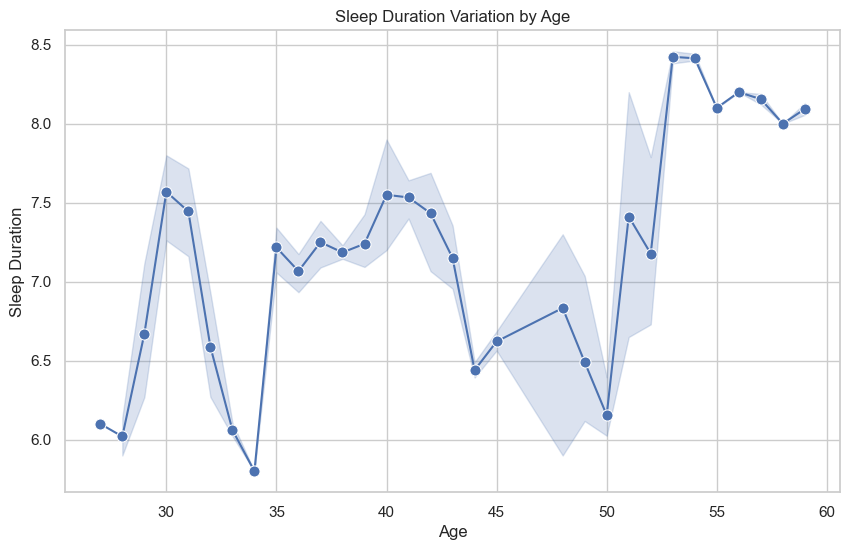

In [233]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a line plot to visualize the variation of sleep duration with age
sns.lineplot(x="Age", y="Sleep Duration", data=sleep_data, marker="o", markersize=8)

# Adding title and labels
plt.title("Sleep Duration Variation by Age")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")

# Displaying the plot
plt.show()


#### 📊 Сonclusions
#### 🟡 Sleep duration tends to decrease slightly with age from the late 30s to the mid-34s, with a peak at around 5.2 hours.
#### 🟢 From the 34 onwards, there is a gradual increase in sleep duration, reaching a peak at around 7.2 to 7.3 hours in the late 40s to early 50s, before gradually declining again.
#### 🔵 Individuals aged 52 and above have a sleep duration ranging from 8 to 8.4 hours and generally exhibit more stable and consistent sleep patterns compared to younger age groups.

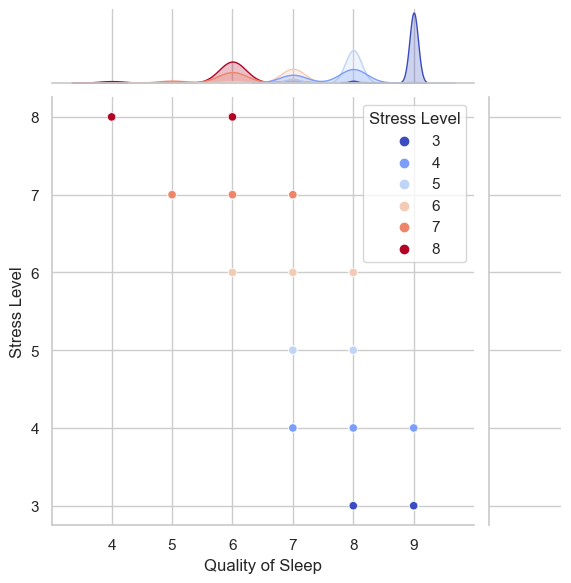

In [206]:
# Creating a jointplot
sns.jointplot(data=sleep_data, x='Quality of Sleep', y='Stress Level', kind='scatter', hue='Stress Level', palette='coolwarm')

# Displaying the plot
plt.show()

#### 📊 Сonclusions 
#### 🔵 High stress levels (7-8) are observed in observations with the medium level of sleep quality 6, indicating that high stress levels may affect sleep quality negatively.
#### 🟡 Observations with the lowest stress level (3) have values for the highest levels of sleep quality 9, suggesting that a low stress level may contribute to improved sleep quality.
#### 🟢 Stress levels 4-6 have a large number of observations in relation to sleep quality levels 6-8, indicating that moderate to high stress levels may be associated with worsened sleep quality.

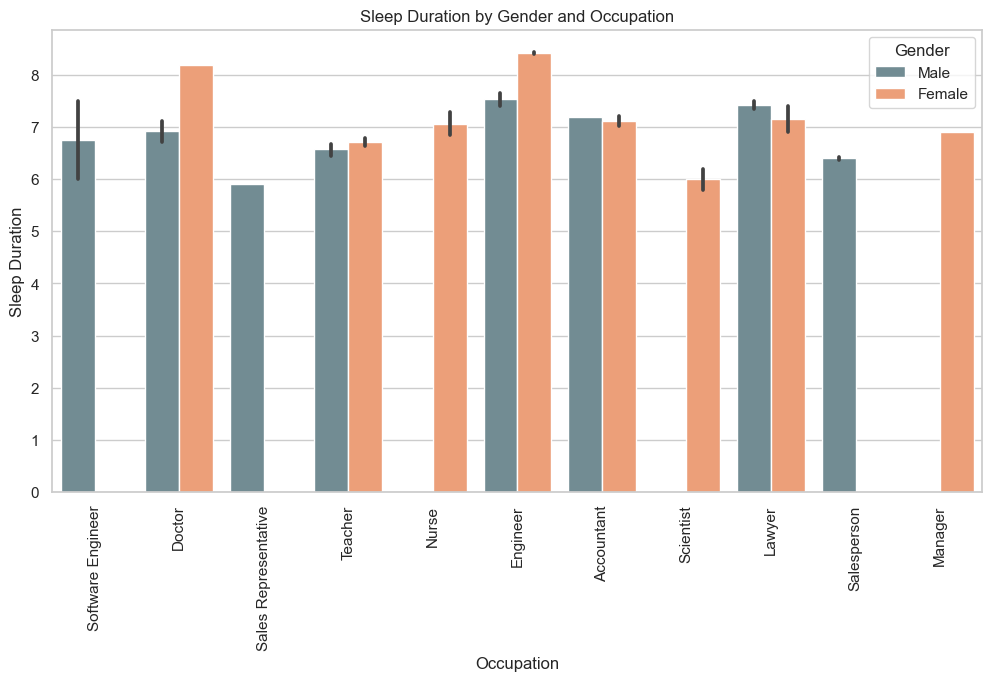

In [251]:
# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Sleep Duration", hue="Gender", data=sleep_data, palette={'Male': '#6c8f99', 'Female': '#ff9966'})
plt.title("Sleep Duration by Gender and Occupation")
plt.xlabel("Occupation")
plt.ylabel("Sleep Duration")
plt.xticks(rotation=90)  
plt.legend(title="Gender")
plt.show()

#### 📊 Сonclusions 
#### 🔵 Accountant: On average, female accountants sleep slightly less than male accountants.
#### 🟡 Engineer: Female engineers have slightly more sleep time compared to male engineers.
#### 🟢 Doctor: Male doctors have slightly lower sleep duration compared to their female counterparts.

### Categorical Variables

<Axes: title={'center': 'Variable Sleep Disorder'}, xlabel='Sleep Disorder', ylabel='count'>

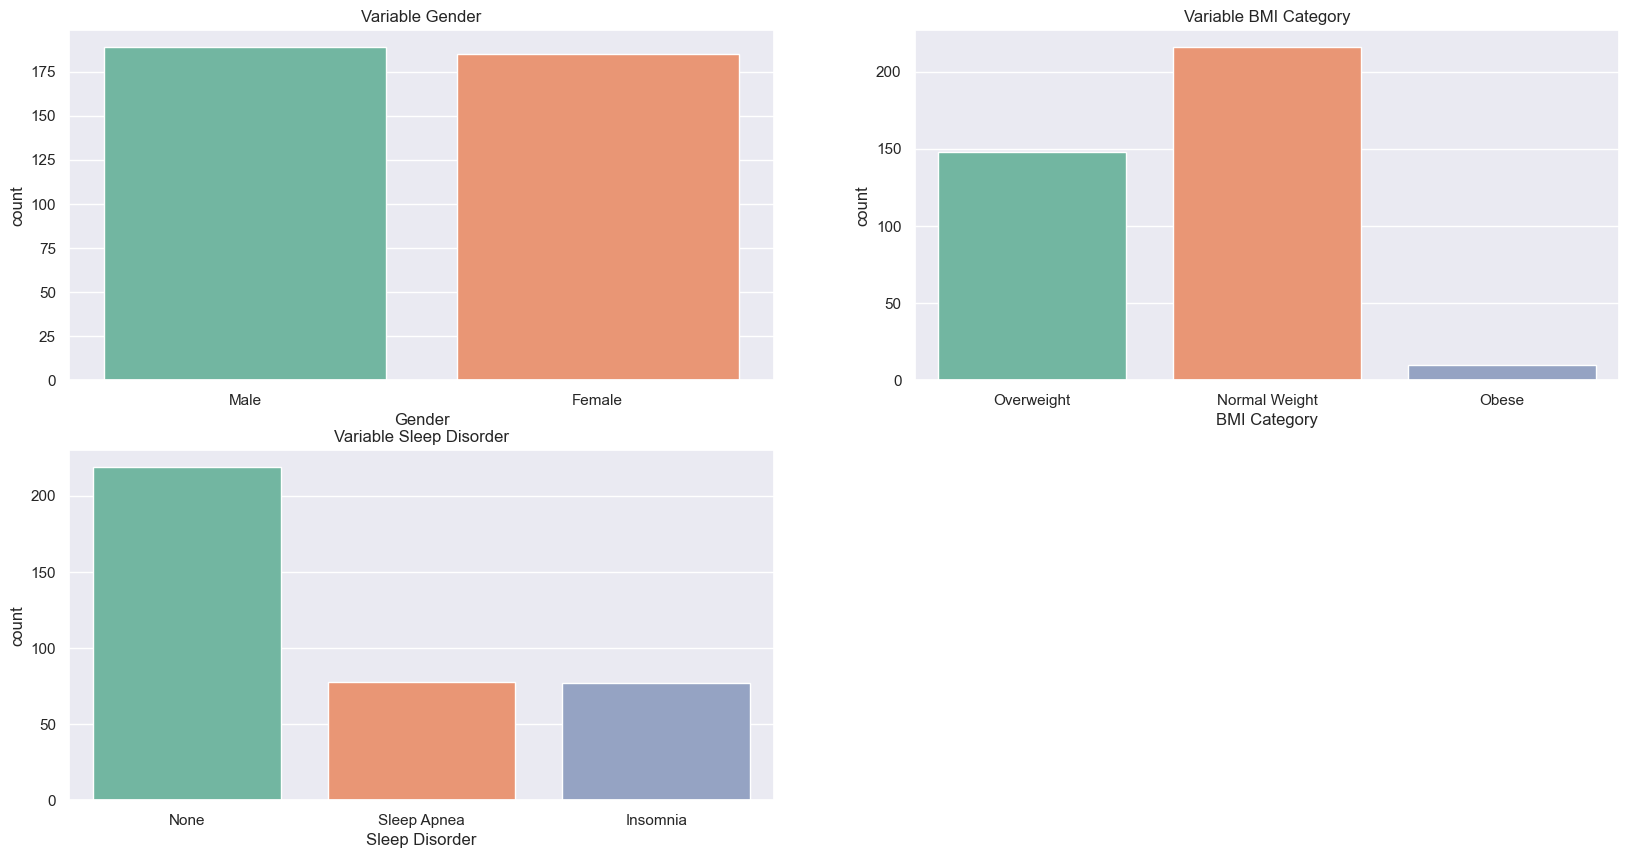

In [135]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = sleep_data)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', palette = 'Set2', data = sleep_data)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Sleep Disorder')
sns.countplot(x = 'Sleep Disorder', palette = 'Set2', data = sleep_data)

#### 📊 Сonclusions 
#### 🔵 Upon examining our categorical variables, it's evident that there's a balanced distribution between males and females.
#### 🟡 Observing the Body Mass Index (BMI) distribution, can note that the majority of individuals fall within the Normal to Overweight range.
#### 🟢 Analyzing target variable, can find that a notable portion of the population doesn't report any sleep-related problems. However, for those who do, occurrences of both insomnia and sleep apnea are evenly distributed.

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

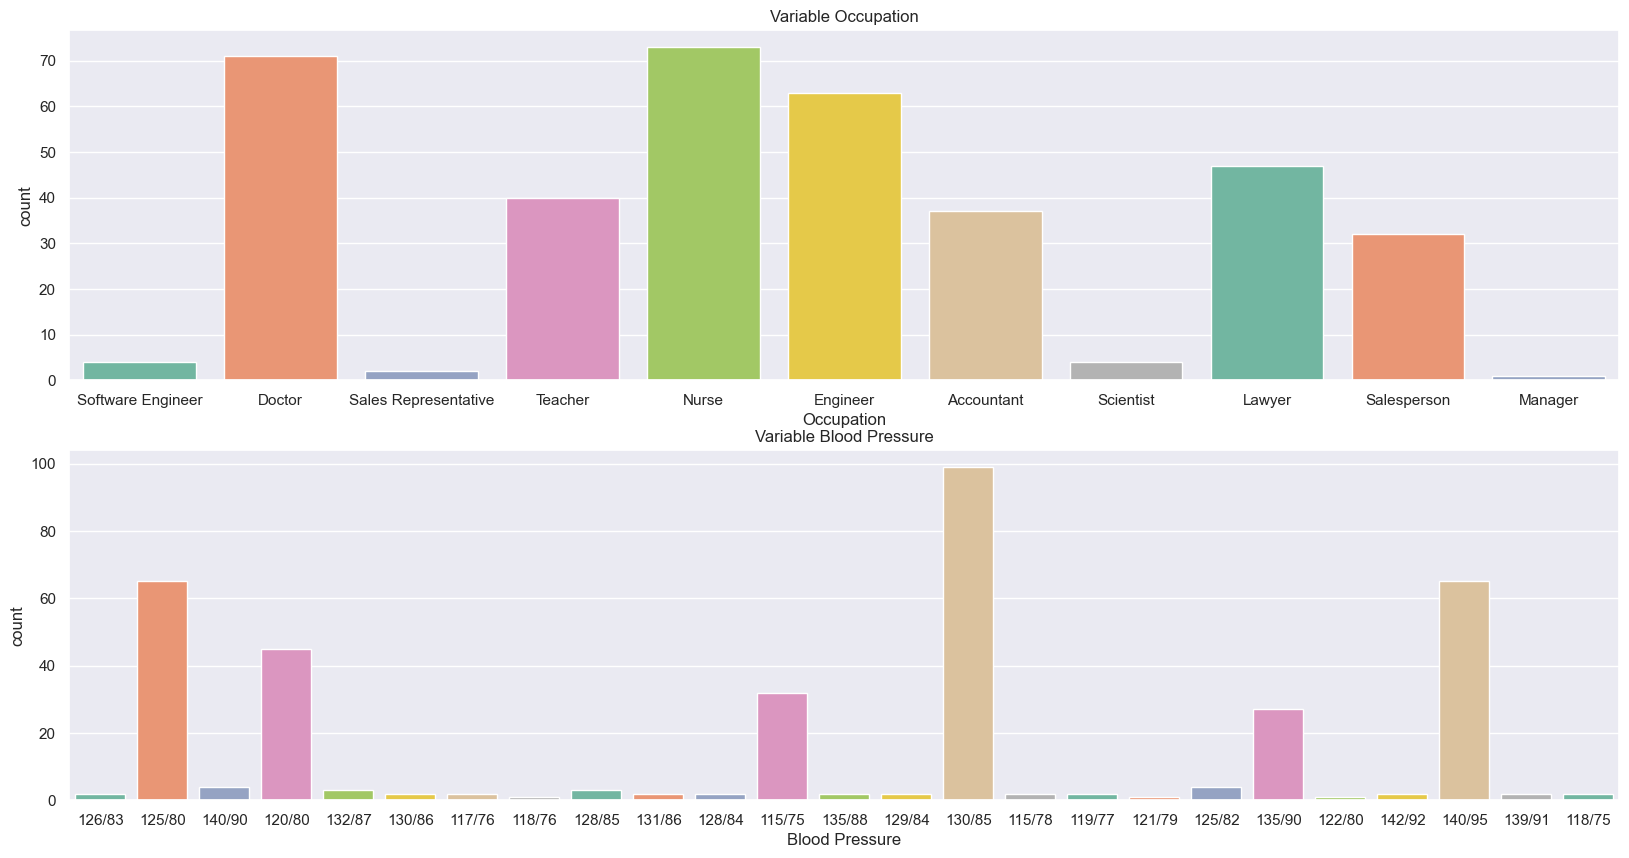

In [136]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', palette = 'Set2', data = sleep_data)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', palette = 'Set2', data = sleep_data)

#### 📊 Сonclusions 
#### 🟡 Occupation
#### Nurses and doctors are the two most common occupations, with counts of 73 and 71, respectively.
#### Engineers and lawyers follow closely behind, with counts of 63 and 47, respectively.
#### Sales representatives and managers are the least common occupations in the dataset, with counts of 2 and 1, respectively.
#### 🔵 Blood Pressure
#### The most common blood pressure among the individuals is 130/85, with a count of 99. 
#### Blood pressures such as 140/95, 125/80, and 120/80 also appear frequently, with counts of 65, 65, and 45, respectively.

### Continuous Variables

<Axes: xlabel='Daily Steps', ylabel='Count'>

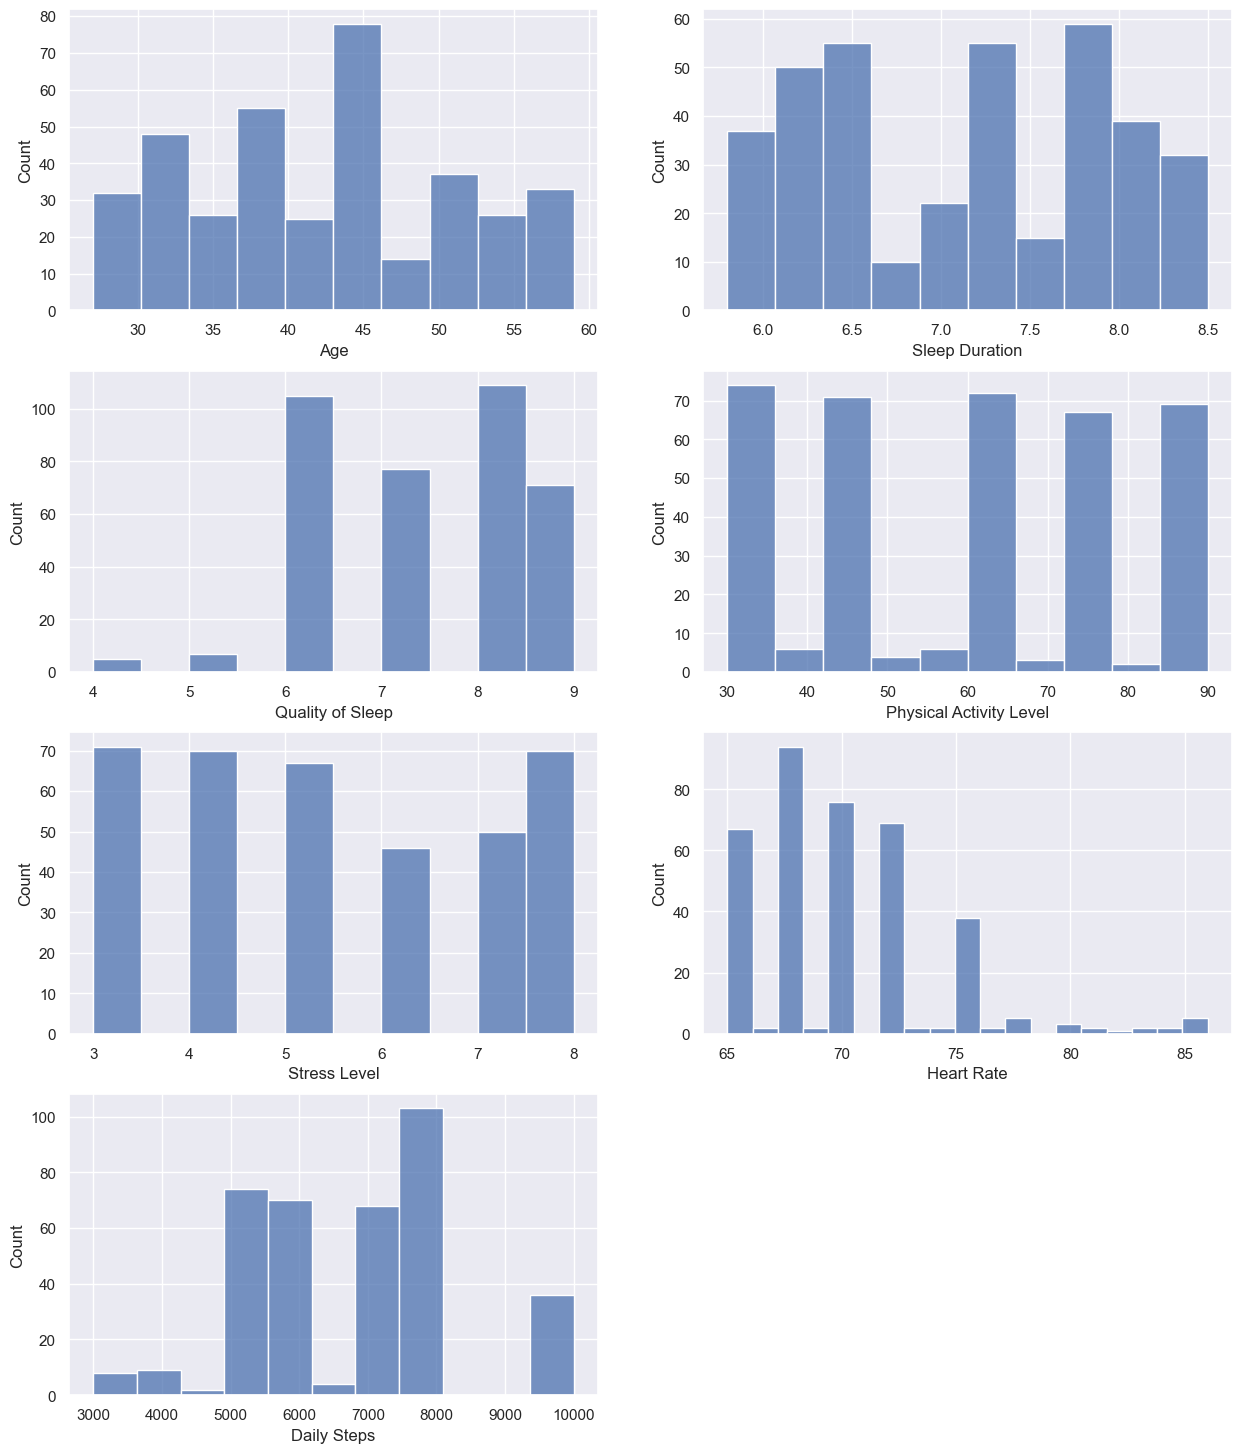

In [268]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x = sleep_data['Age'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = sleep_data['Sleep Duration'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = sleep_data['Quality of Sleep'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = sleep_data['Physical Activity Level'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = sleep_data['Stress Level'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = sleep_data['Heart Rate'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = sleep_data['Daily Steps'], kde = False)

### Bivariate Analysis

<Axes: title={'center': 'Variable BMI Category'}, xlabel='BMI Category', ylabel='count'>

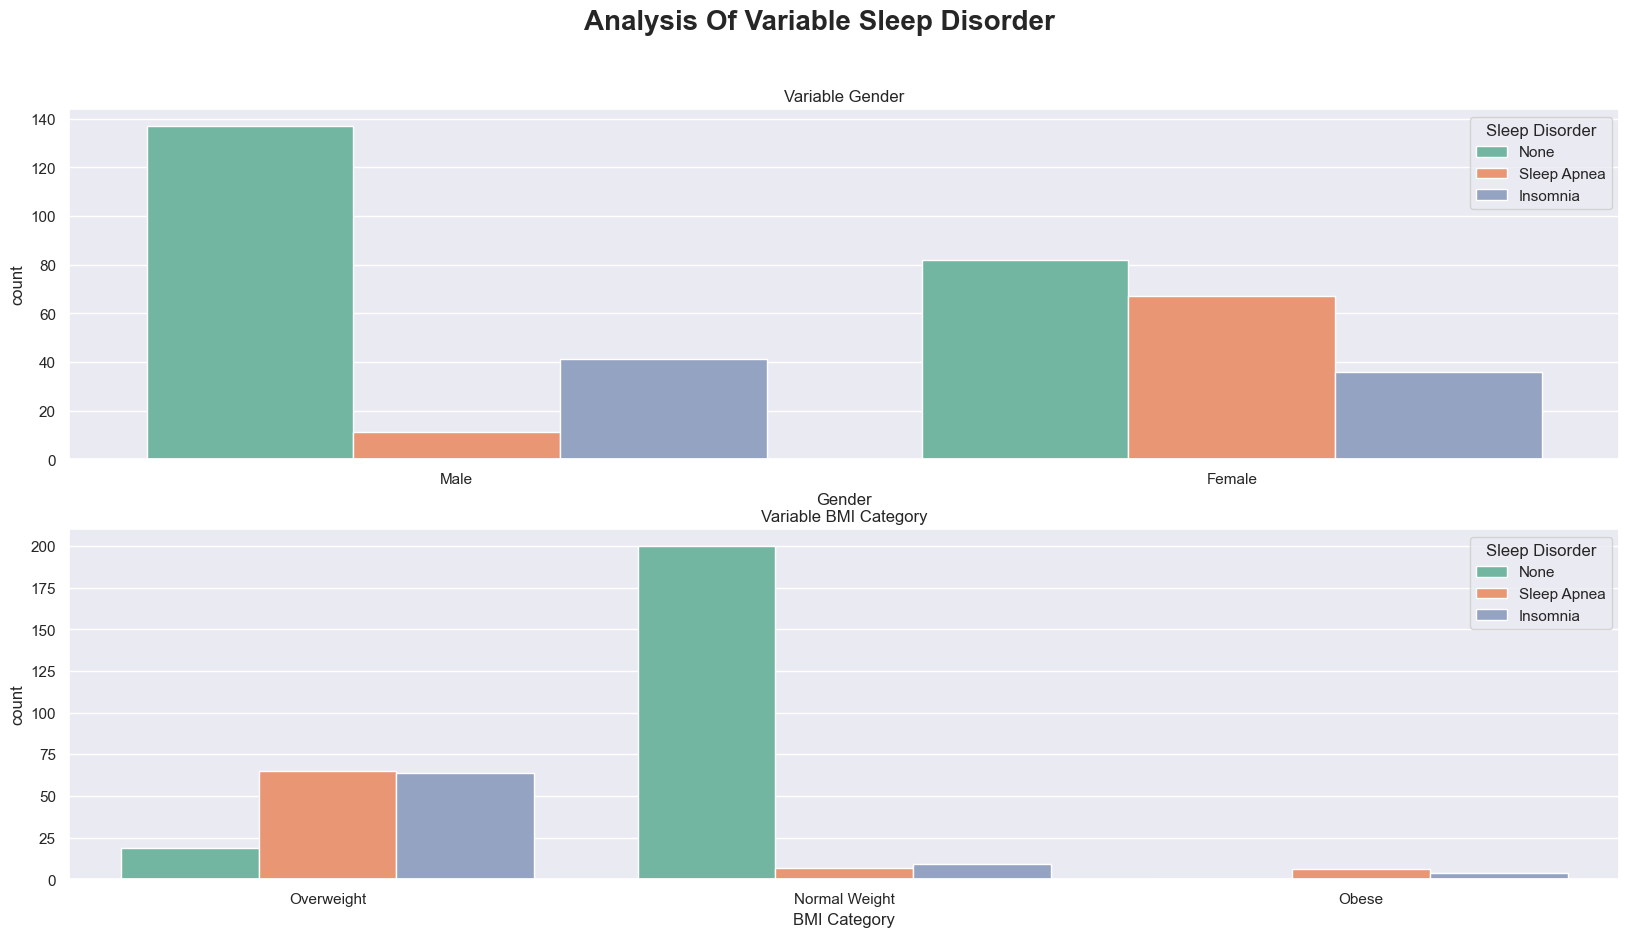

In [269]:
plt.figure(figsize = (20, 10))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Sleep Disorder', palette = 'Set2', data = sleep_data)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', palette = 'Set2', data = sleep_data)

#### 📊 Сonclusions 
#### 🔵 When we compare our Target variable with our categorical variables we can see interesting patterns, such as females having much more sleep problems. 
#### 🟡 When we look at the BMI variable, overweight people are much more likely to have sleep problems, people of normal weight generally do not have any problems.

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

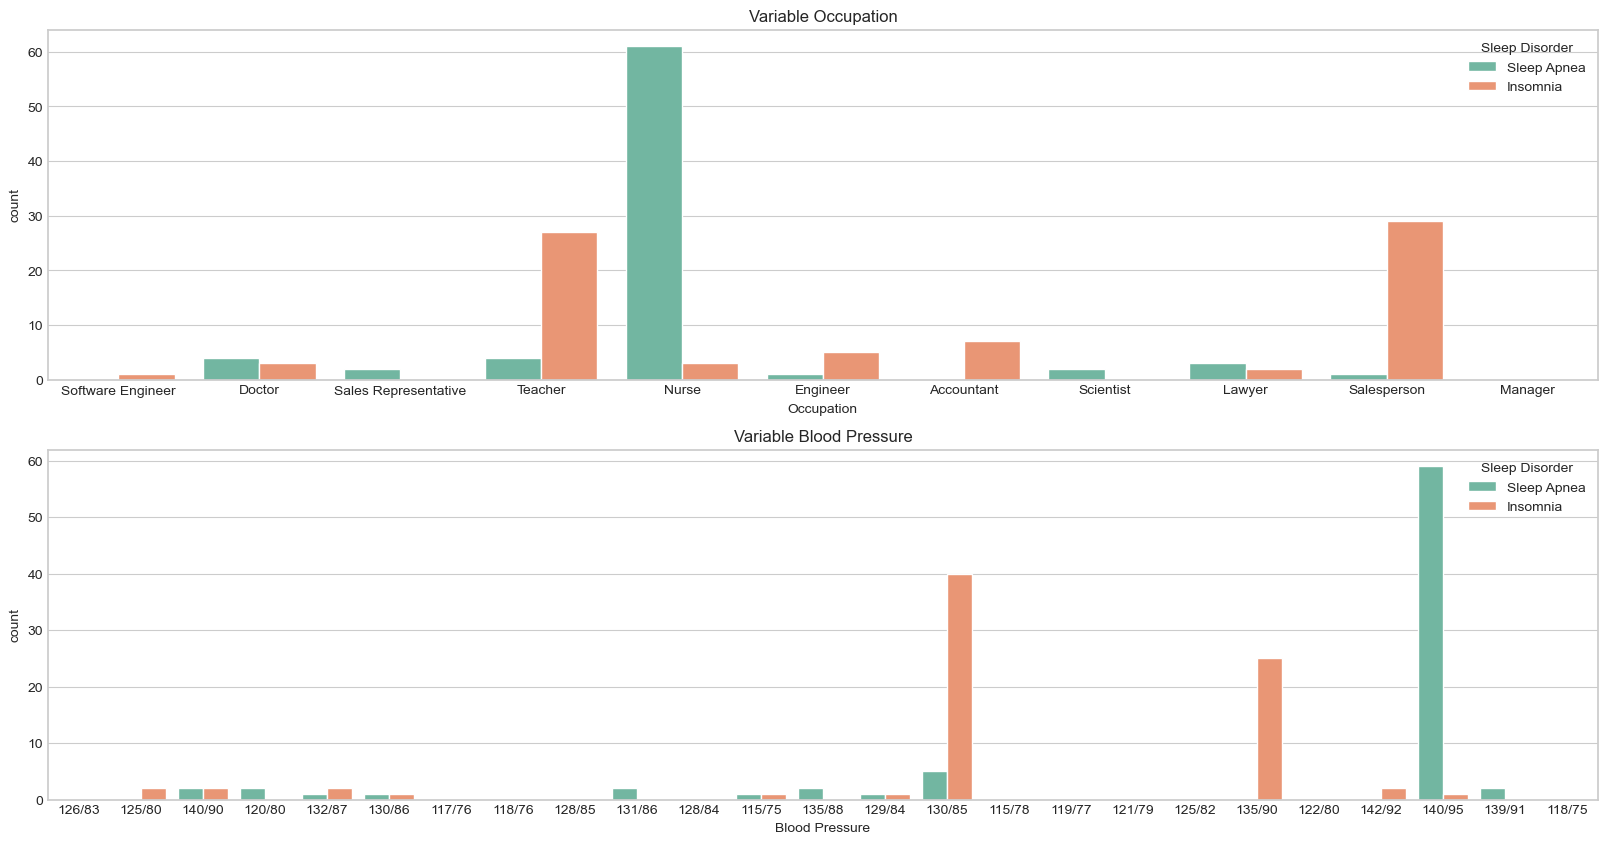

In [243]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', palette = 'Set2', data = sleep_data)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', hue = 'Sleep Disorder', palette = 'Set2', data = sleep_data)

#### 📊 Сonclusions 
#### 🟡 When we look at the patient's profession, we can see a very interesting thing, Teachers, Nurses and Salesperson are much more likely to have problems with sleep. 
#### 🟢 When we look at Lawyers, Scientist and Engineers we can see that they generally don't have any problems.

<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

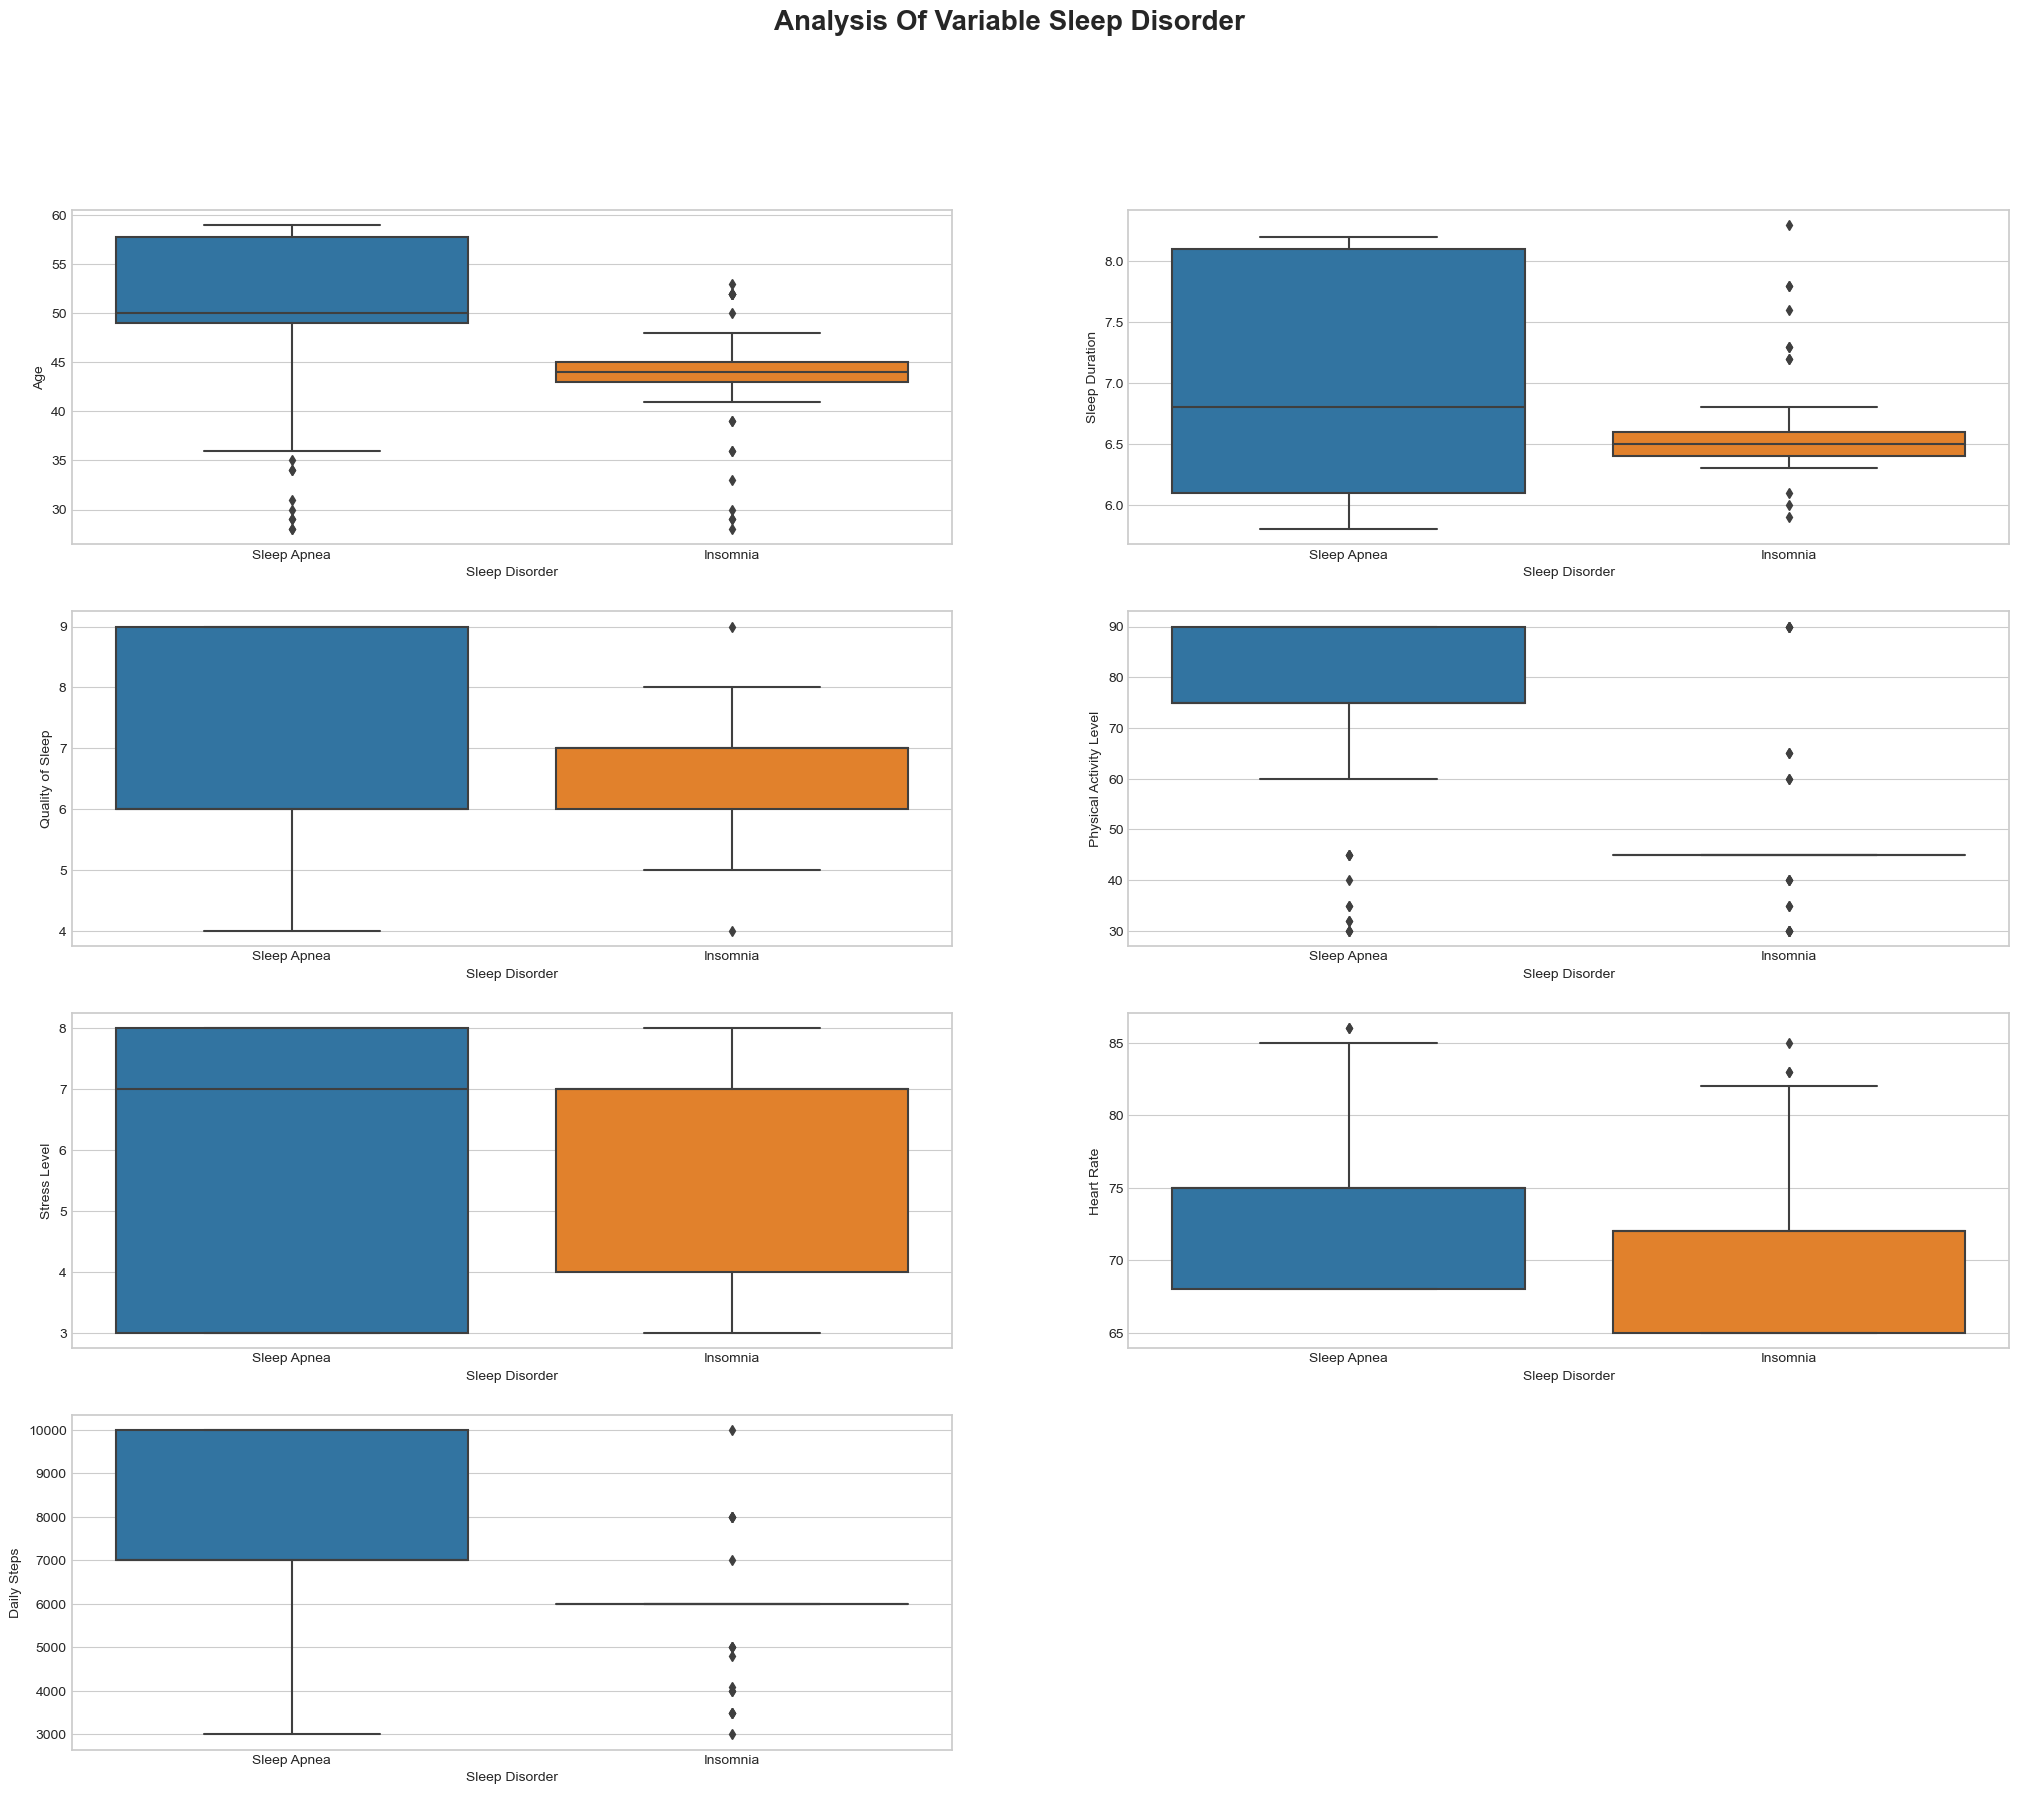

In [244]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Sleep Disorder", y="Age", data=sleep_data)

plt.subplot(4,2,2)
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=sleep_data)

plt.subplot(4,2,3)
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=sleep_data)

plt.subplot(4,2,4)
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level", data=sleep_data)

plt.subplot(4,2,5)
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=sleep_data)

plt.subplot(4,2,6)
sns.boxplot(x="Sleep Disorder", y="Heart Rate", data=sleep_data)

plt.subplot(4,2,7)
sns.boxplot(x="Sleep Disorder", y="Daily Steps", data=sleep_data)

### Correlation Heatmap 

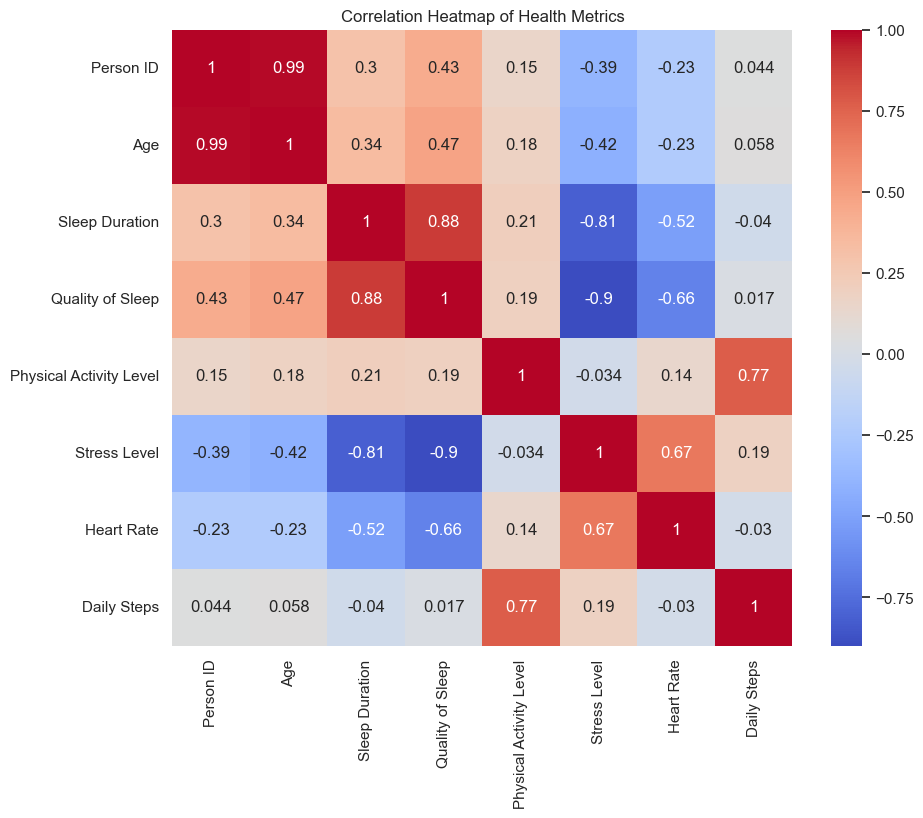

In [133]:
# Exclude non-numeric columns from the correlation calculation
numeric_columns = sleep_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Health Metrics")
plt.show()

## 3D scatter plot

In [241]:
# Creating a 3D scatter plot
fig = px.scatter_3d(sleep_data,  # Dataframe containing the data
                     x='Age',  # X-axis variable
                     y='Daily Steps',  # Y-axis variable
                     z='Quality of Sleep',  # Z-axis variable
                     color='Sleep Disorder',  # Color variable
                     width=900,  # Width of the plot
                     height=800,  # Height of the plot
                     color_discrete_map={'None': '#6c8f99', 'Insomnia': '#4A235A', 'Sleep Apnea': '#ff9966'})  # Color map

# Updating the layout of the plot
fig.update_layout(title='<b>Relationship between Age, Daily Steps, and Quality of Sleep and Their Effect on Sleep Disorder</b>',
                  titlefont={'size': 20, 'family': 'Serif'},  # Title font settings
                  showlegend=True)  # Display legend

# Displaying the plot
fig.show()

In [182]:
# Creating a 3D scatter plot
fig = px.scatter_3d(sleep_data,  # Dataframe containing the data
                     x='Occupation',  # X-axis variable
                     y='Stress Level',  # Y-axis variable
                     z='Physical Activity Level',  # Z-axis variable
                     color='Sleep Disorder',  # Color variable
                     width=900,  # Width of the plot
                     height=800,  # Height of the plot
                     color_discrete_map={'None': '#6c8f99', 'Insomnia': '#4A235A', 'Sleep Apnea': '#ff9966'})  # Color map

# Updating the layout of the plot
fig.update_layout(title='<b>Relationship between Occupation, Stress and Physical Activity Level and effect on Sleep Disorder</b>',
                  titlefont={'size': 20, 'family': 'Serif'},  # Title font settings
                  showlegend=True)  # Display legend

# Displaying the plot
fig.show()

In [179]:
# Creating a 3D scatter plot
fig = px.scatter_3d(sleep_data,  # Dataframe containing the data
                     x='Heart Rate',  # X-axis variable
                     y='Blood Pressure',  # Y-axis variable
                     z='Age',  # Z-axis variable
                     color='Gender',  # Color variable
                     width=900,  # Width of the plot
                     height=800,  # Height of the plot
                     color_discrete_map={'Male': '#6c8f99', 'Female': '#ff9966'})  # Color map

# Layout of the plot
fig.update_layout(title='<b>Relationship between Heart Rate, Blood Pressure, and Age based on Gender</b>',
                  titlefont={'size': 20, 'family': 'Serif'},  # Title font settings
                  showlegend=True)  # Display legend

# Displaying the plot
fig.show()